<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/DECISIONTREES_CarEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

In [32]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [50]:
cars = pd.read_csv('/content/car_evaluation.csv', names=['BuyingPrice','MaintenanceCost','Doors','No_persons','lug_boot','Safety','Decision'])
cars.head()

,BuyingPrice,MaintenanceCost,Doors,No_persons,lug_boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,BuyingPrice,MaintenanceCost,Doors,No_persons,lug_boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BuyingPrice      1728 non-null   object
 1   MaintenanceCost  1728 non-null   object
 2   Doors            1728 non-null   object
 3   No_persons       1728 non-null   object
 4   lug_boot         1728 non-null   object
 5   Safety           1728 non-null   object
 6   Decision         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [39]:
encoder = ce.OrdinalEncoder(cols = ['BuyingPrice','MaintenanceCost','Doors','No_persons','lug_boot','Safety'])

In [40]:
x = encoder.fit_transform(cars.iloc[:,0:6])
y = cars.iloc[:,-1]

In [41]:
x

,BuyingPrice,MaintenanceCost,Doors,No_persons,lug_boot,Safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [42]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Decision, Length: 1728, dtype: object

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_test

,BuyingPrice,MaintenanceCost,Doors,No_persons,lug_boot,Safety
599,1,1,1,1,1,1
1201,2,2,2,2,1,2
628,1,1,3,1,2,2
1498,3,1,3,2,1,2
1263,2,2,1,3,1,3
...,...,...,...,...,...,...
100,4,3,3,3,3,2
274,4,4,1,1,1,2
1206,2,2,2,3,3,3
101,4,3,3,3,3,1


In [45]:
x_train

,BuyingPrice,MaintenanceCost,Doors,No_persons,lug_boot,Safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3
...,...,...,...,...,...,...
1130,2,3,2,1,3,1
1294,2,2,1,1,1,2
860,4,2,1,1,3,1
1459,3,4,3,3,2,2


DECISION TREE C5.0

In [59]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.5769230769230769, 0.9166666666666666, 'X[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.75, 'X[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.4230769230769231, 0.5833333333333334, 'X[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[0] <= 1.5\nentropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]'),
 Text(0.23076923076923078, 0.25, 'X[0] <= 3.5\nentropy = 0.999\nsamples = 112\nvalue = [54, 0, 58, 0]'),
 Text(0.15384615384615385, 0.08333333333333333, 'entropy = 0.868\nsamples = 76\nvalue = [54, 0, 22, 0]'),
 Text(0.3076923076923077, 0.08333333333333333, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36, 0]'),
 Text(0.6923076923076923, 0.4166666666666667, 'X[0] <= 1.5\nentropy = 1.693\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.538461538461

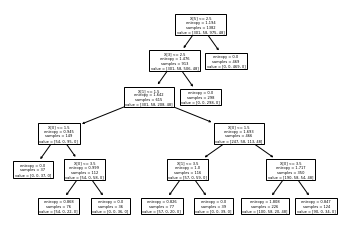

In [60]:
tree.plot_tree(model)

[Text(0.5769230769230769, 0.9166666666666666, 'Safety <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]\nclass = vgood'),
 Text(0.5, 0.75, 'No_persons <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]\nclass = vgood'),
 Text(0.4230769230769231, 0.5833333333333334, 'MaintenanceCost <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]\nclass = unacc'),
 Text(0.15384615384615385, 0.4166666666666667, 'BuyingPrice <= 1.5\nentropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]\nclass = vgood'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]\nclass = vgood'),
 Text(0.23076923076923078, 0.25, 'BuyingPrice <= 3.5\nentropy = 0.999\nsamples = 112\nvalue = [54, 0, 58, 0]\nclass = vgood'),
 Text(0.15384615384615385, 0.08333333333333333, 'entropy = 0.868\nsamples = 76\nvalue = [54, 0, 22, 0]\nclass = unacc'),
 Text(0.3076923076923077, 0.08333333333333333, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36, 0]\nclass 

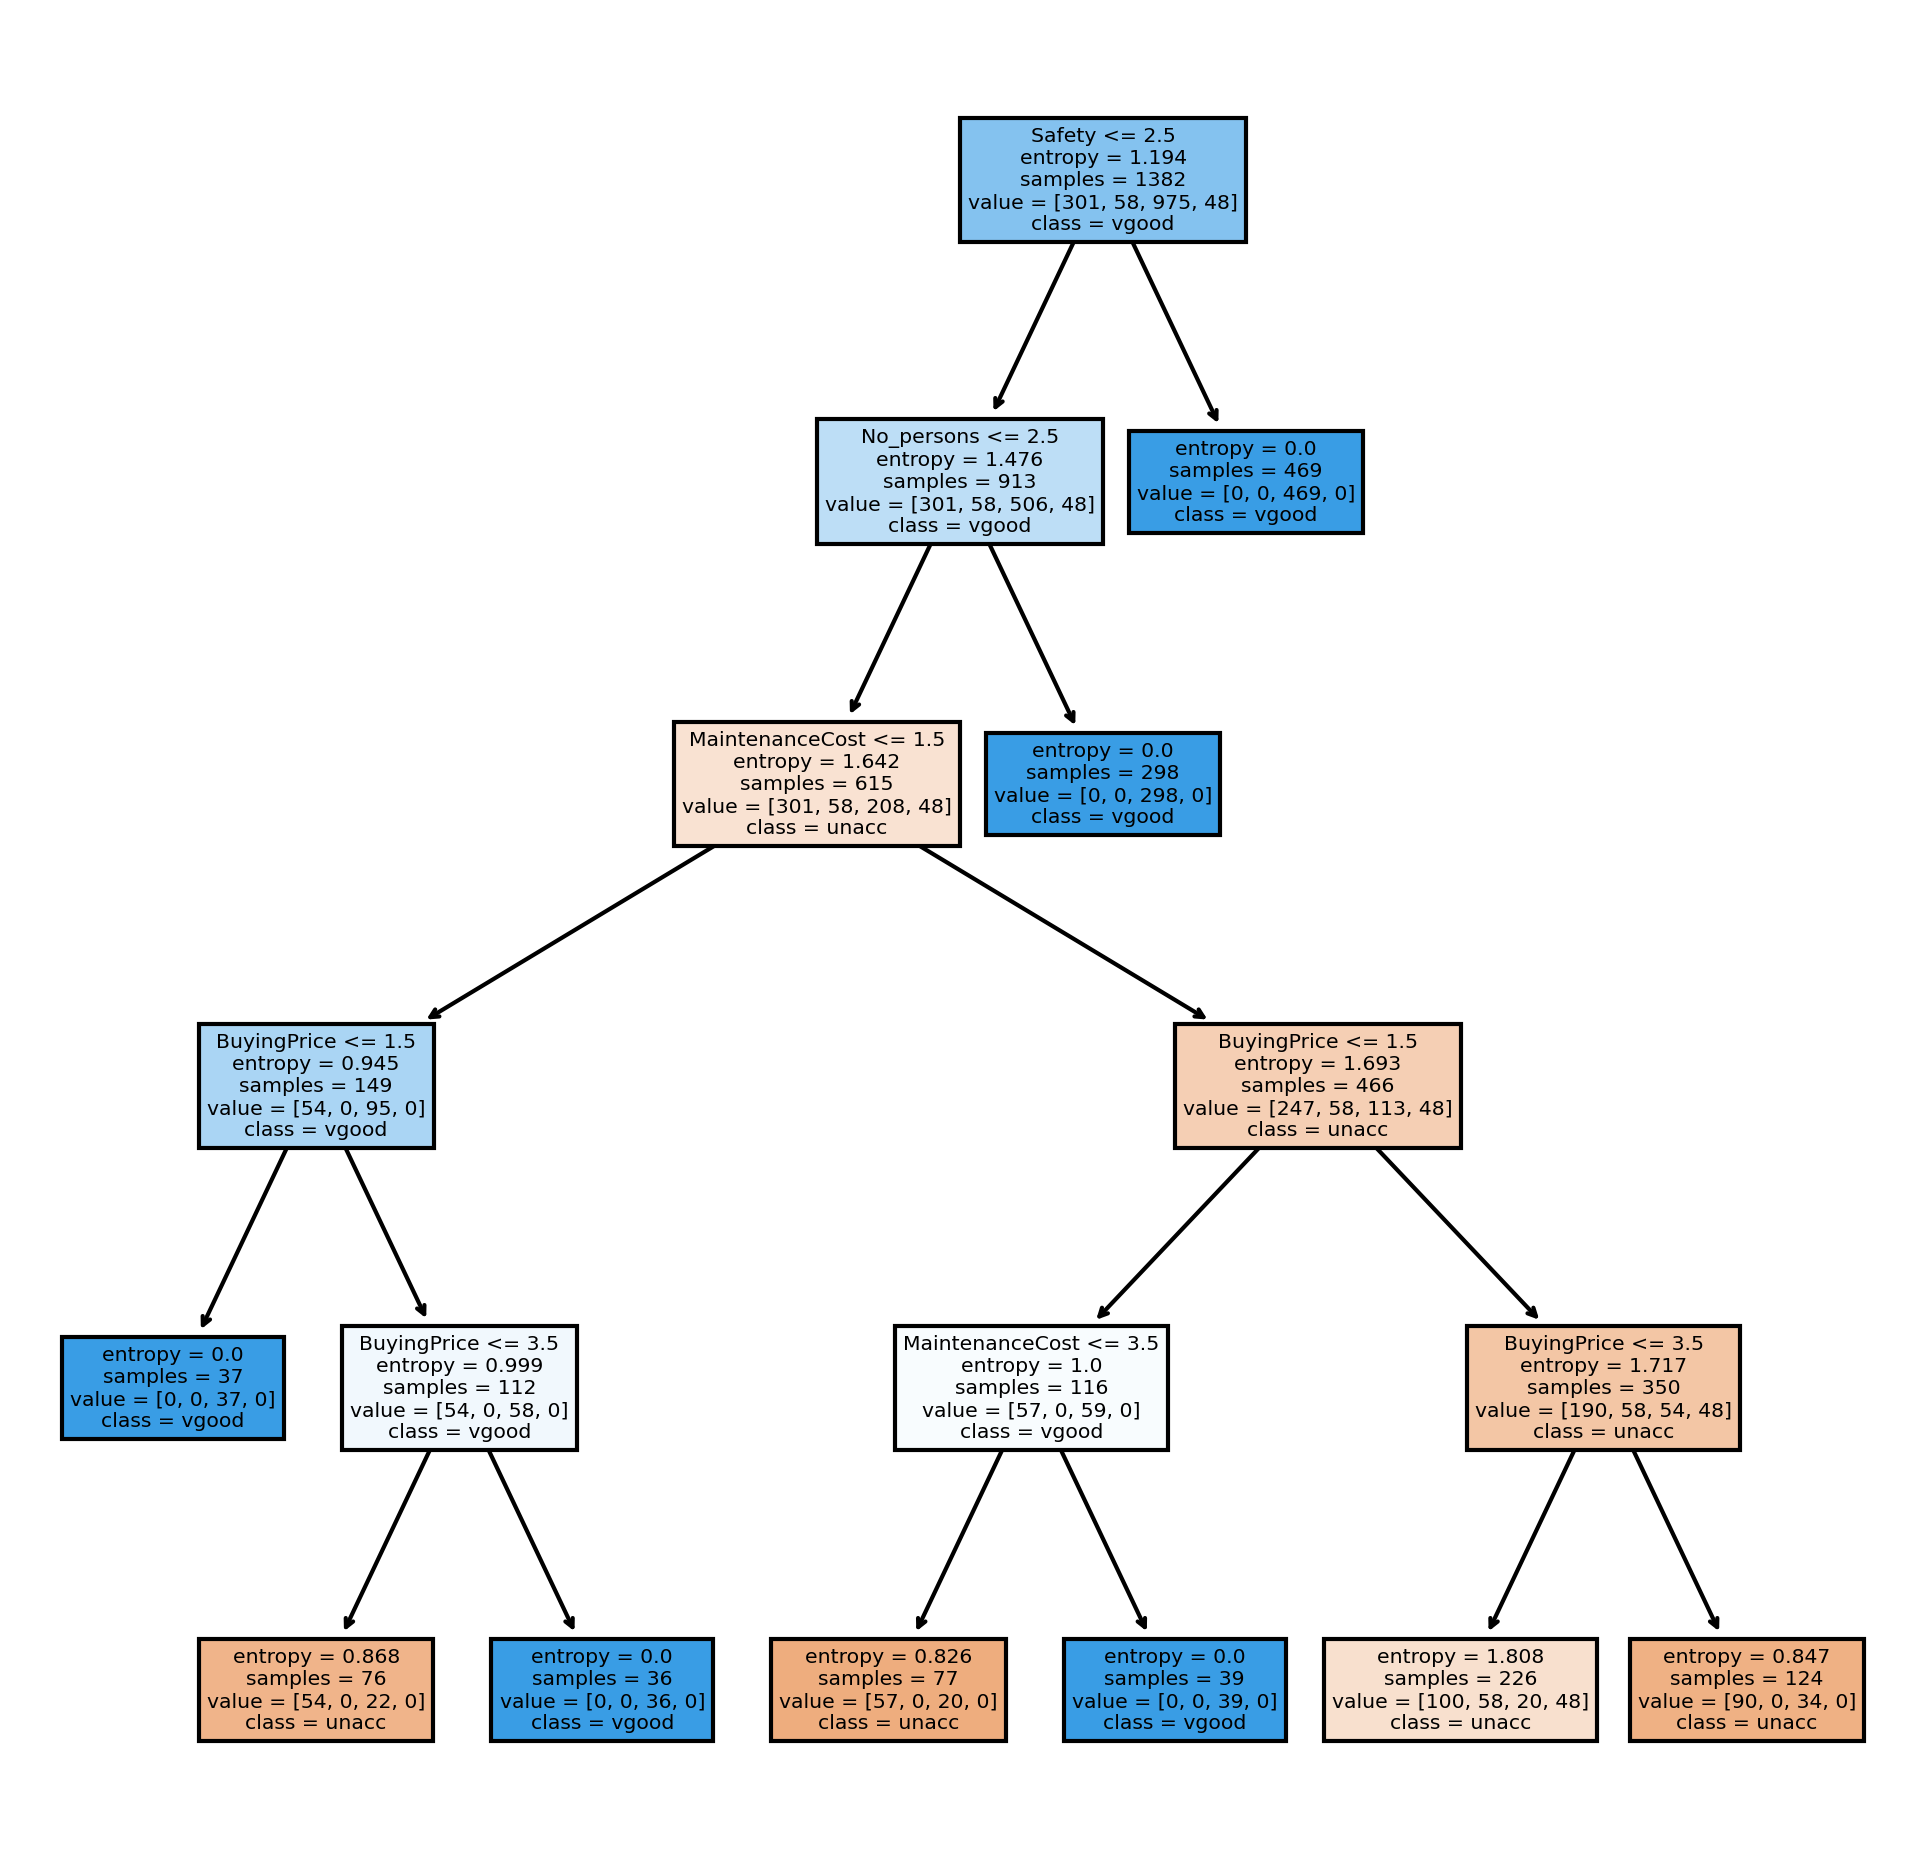

In [61]:
fn=['BuyingPrice','MaintenanceCost','Doors','No_persons','lug_boot','Safety']
cn=['unacc', 'acc', 'vgood', 'good']
figure = plt.figure(figsize=(8,8),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [62]:
y_pred = model.predict(x_test)
y_pred

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc

In [63]:
pd.crosstab(y_test,y_pred)

col_0,acc,unacc
Decision,,
acc,36,47
good,5,6
unacc,83,152
vgood,5,12


In [64]:
#Calculating accuracy
np.round(np.mean(y_pred==y_test),2)

0.54

CART ANALYSIS

In [66]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=6)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [67]:
y_pred = model_gini.predict(x_test)

In [69]:
pd.crosstab(y_test,y_pred)

col_0,acc,good,unacc
Decision,,,
acc,26,7,50
good,1,4,6
unacc,65,13,157
vgood,4,1,12


[Text(0.484375, 0.9285714285714286, 'Safety <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]\nclass = vgood'),
 Text(0.421875, 0.7857142857142857, 'No_persons <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]\nclass = vgood'),
 Text(0.359375, 0.6428571428571429, 'MaintenanceCost <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]\nclass = unacc'),
 Text(0.125, 0.5, 'BuyingPrice <= 1.5\ngini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]\nclass = vgood'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]\nclass = vgood'),
 Text(0.1875, 0.35714285714285715, 'BuyingPrice <= 3.5\ngini = 0.499\nsamples = 112\nvalue = [54, 0, 58, 0]\nclass = vgood'),
 Text(0.125, 0.21428571428571427, 'Safety <= 1.5\ngini = 0.411\nsamples = 76\nvalue = [54, 0, 22, 0]\nclass = unacc'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.095\nsamples = 40\nvalue = [38, 0, 2, 0]\nclass = unacc'),
 Text(0.1875, 0.07142857142857142, 'gini = 0.494

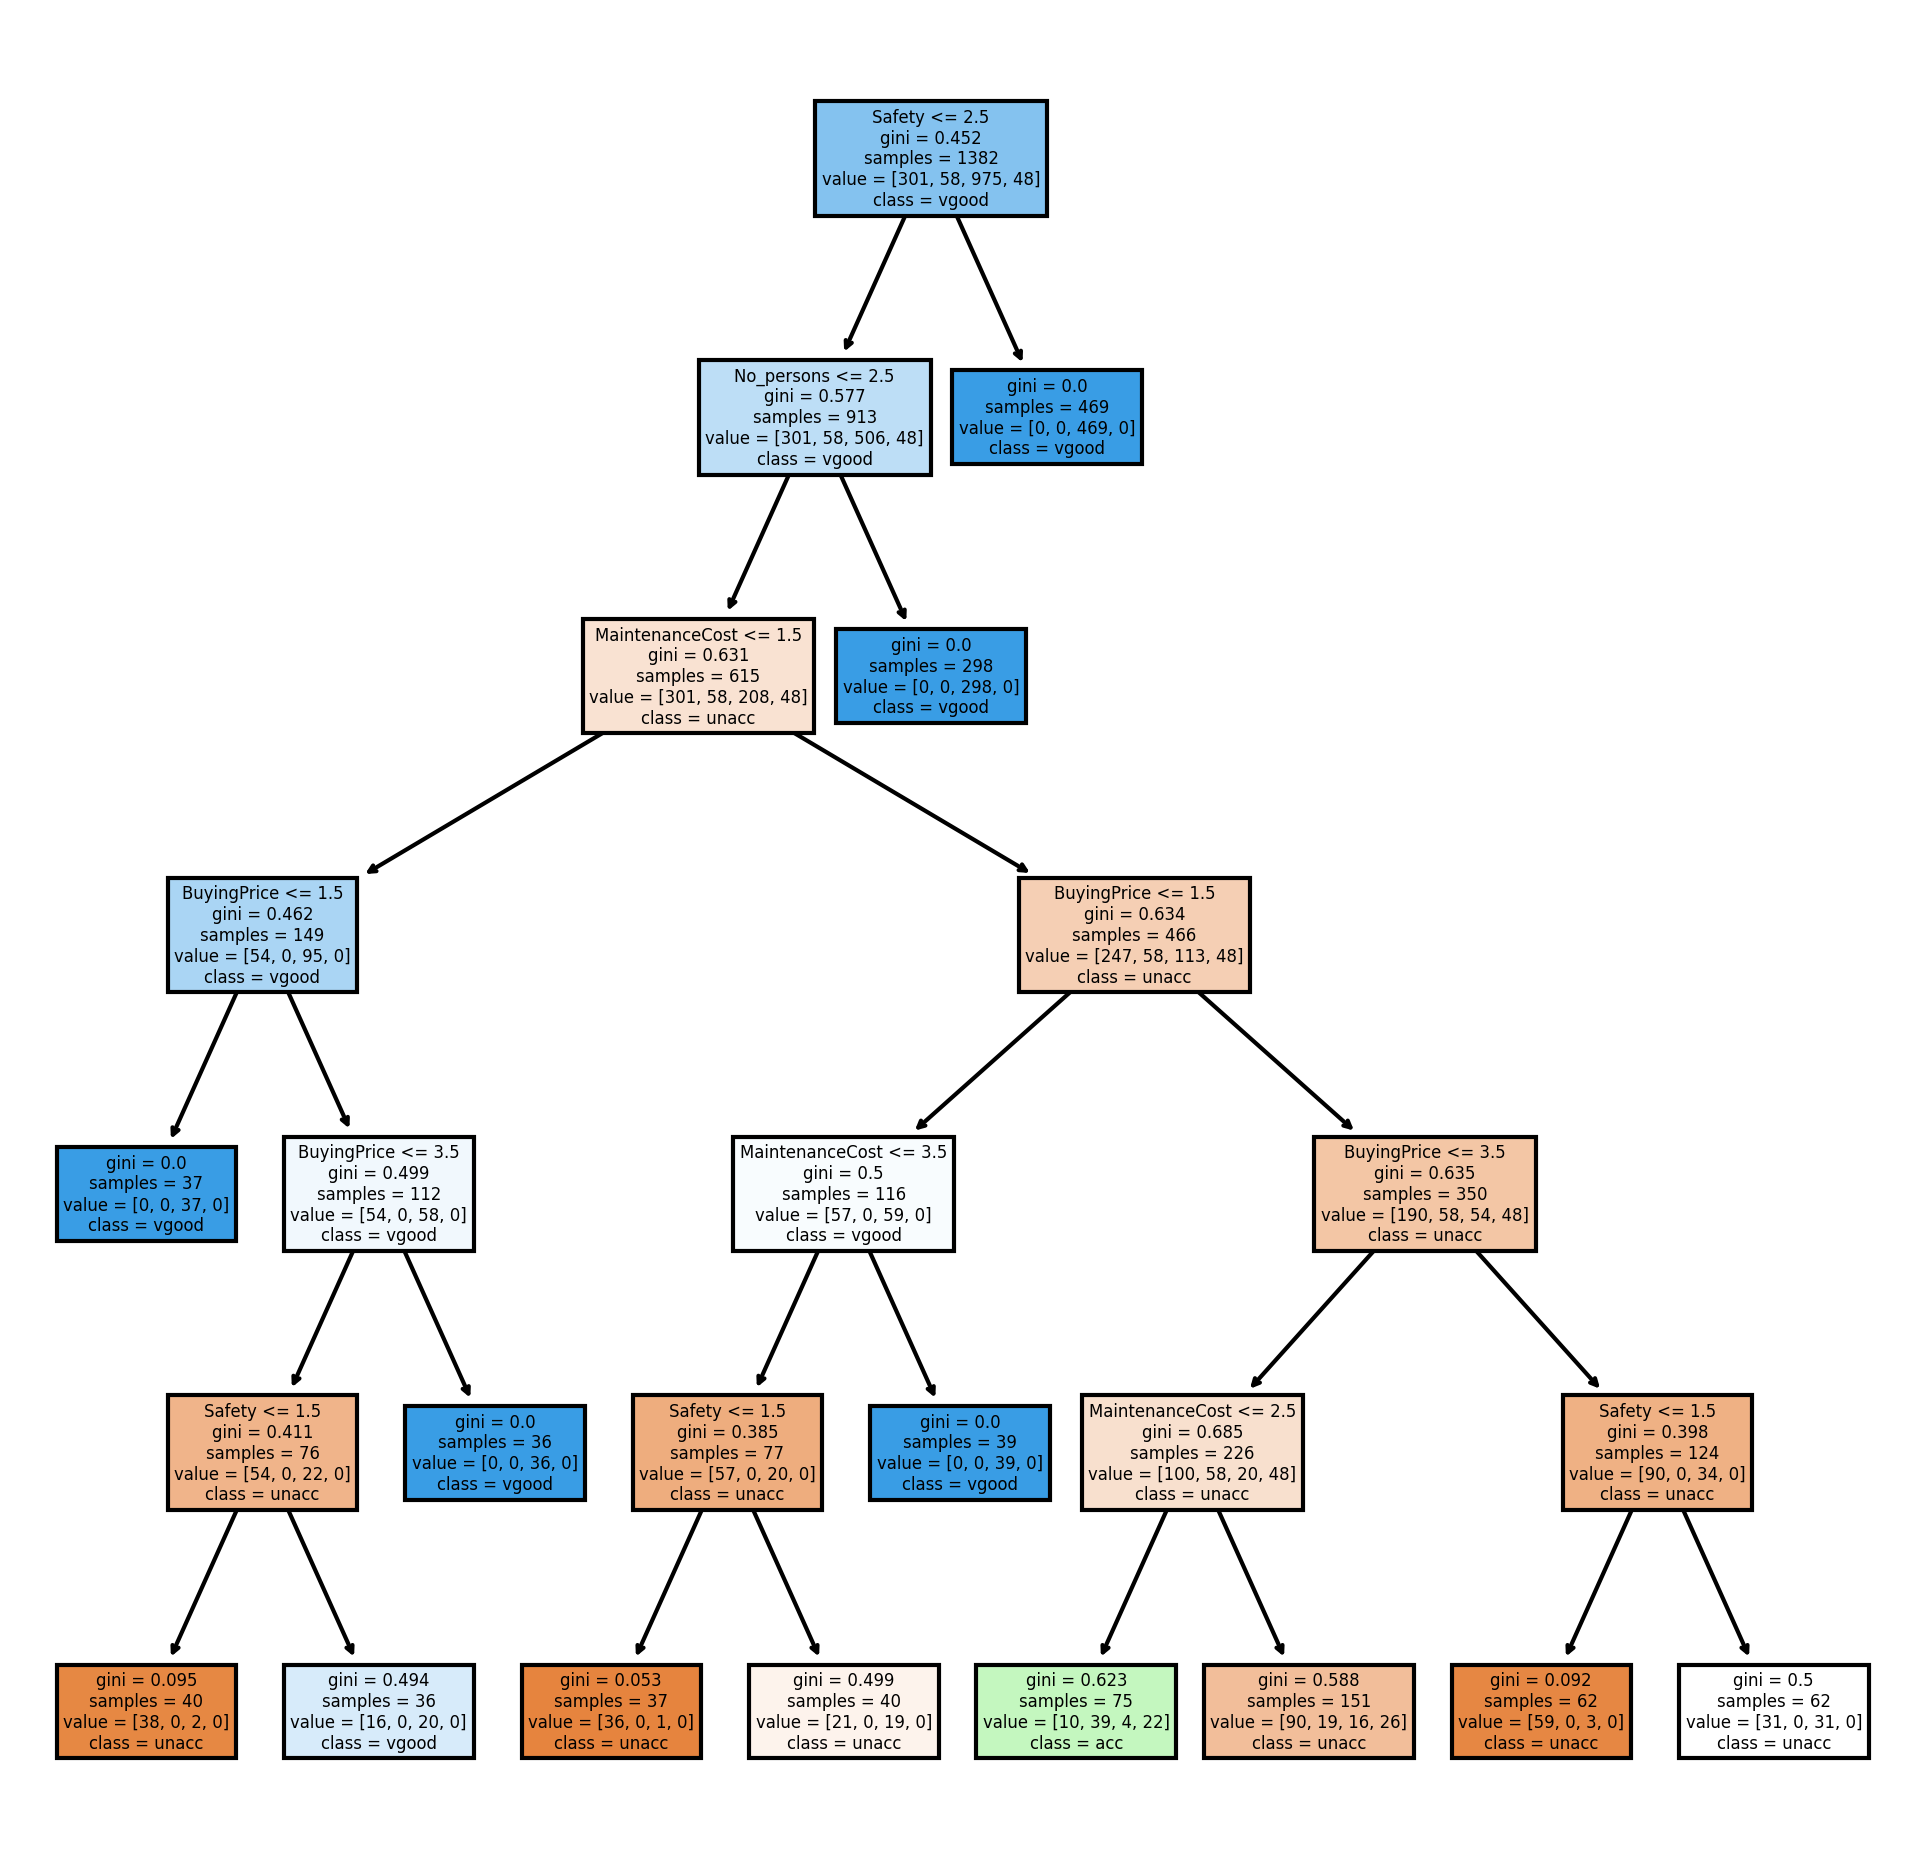

In [70]:
fn=['BuyingPrice','MaintenanceCost','Doors','No_persons','lug_boot','Safety']
cn=['unacc', 'acc', 'vgood', 'good']
figure = plt.figure(figsize=(8,8),dpi=300)
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True)

In [72]:
#Accuracy
model_gini.score(x_test,y_test)

0.5404624277456648